# Programming and Database Fundamentals for Data Scientists - EAS503


## Data Manipulation with Pandas

Previously, we dove into detail on NumPy and its ``ndarray`` object, which provides efficient storage and manipulation of dense typed arrays in Python.
Here we'll build on this knowledge by looking in detail at the data structures provided by the Pandas library.
Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``.
``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we saw, NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks.
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

In this notebook, we will focus on the mechanics of using ``Series``, ``DataFrame``, and related structures effectively.
We will use examples drawn from real datasets where appropriate, but these examples are not necessarily the focus.

## Installing and Using Pandas

Installation of Pandas on your system requires NumPy to be installed, and if building the library from source, requires the appropriate tools to compile the C and Cython sources on which Pandas is built.
Details on this installation can be found in the [Pandas documentation](http://pandas.pydata.org/).

Once Pandas is installed, you can import it and check the version:

In [1]:
import pandas
pandas.__version__

'0.22.0'

Just as we generally import NumPy under the alias ``np``, we will import Pandas under the alias ``pd``:

In [2]:
import pandas as pd

This import convention will be used throughout the remainder of this book.

## Introducing Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

In [3]:
import numpy as np
import pandas as pd

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [42]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(type(data))
data

<class 'pandas.core.series.Series'>


0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [43]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [9]:
data[1]

0.5

In [44]:
d1 = data[1:3]
print(type(d1))

<class 'pandas.core.series.Series'>


In [46]:
d1[1] = 1000
print(d1)
print(data)

1    1000.00
2       0.75
dtype: float64
0       0.25
1    1000.00
2       0.75
3       1.00
dtype: float64


In [47]:
ind2 = pd.Int64Index([4, 7], dtype='int64')

In [48]:
d1.index = ind2

In [49]:
d1

4    1000.00
7       0.75
dtype: float64

In [50]:
d1[7] = 999

In [51]:
data

0       0.25
1    1000.00
2     999.00
3       1.00
dtype: float64

In [22]:
d2 = data[data < 2]

In [31]:
for i in d2.index:
    print(data[i])

0.25
0.75
1.0


In [40]:
d2[4] = 1000

In [41]:
data

0      0.25
1    100.00
2      0.75
3      1.00
dtype: float64

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [14]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

And the item access works as expected:

In [15]:
data['b']

0.5

In [56]:
data.b

0.5

In [19]:
data1 = data[['a','c']]

In [20]:
data1

a    0.25
c    0.75
dtype: float64

We can even use non-contiguous or non-sequential indices:

In [26]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [27]:
data.index

Int64Index([2, 5, 3, 7], dtype='int64')

In [28]:
data[2]

0.25

In [30]:
ind1 = pd.Index([2,3,5,7])

In [31]:
data[ind1]

2    0.25
3    0.75
5    0.50
7    1.00
dtype: float64

### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [32]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [33]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [40]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [14]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [15]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [16]:
pd.Series({2:'a', 1:'b', 3:'c'})

1    b
2    a
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [34]:
d1 = pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

In [35]:
d1

3    c
2    a
dtype: object

In [36]:
d1[2] = 'd'

In [37]:
d1

3    c
2    d
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [3]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [6]:
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [38]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [39]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [9]:
states.columns

Index(['area', 'population'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

We can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [42]:
area['California']

423967

In [44]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [45]:
states['New York']

KeyError: 'New York'

Notice the potential point of confusion here: in a two-dimensional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [46]:
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [48]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [51]:
[{'a': i, 'b': 2 * i} for i in range(3)]

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]

In [49]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [52]:
pd.DataFrame([{'a': 1, 'b': 2.0}, {'a': 2, 'b': 4}])

,a,b
0,1,2.0
1,2,4.0


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [53]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [26]:
pd.DataFrame({'population': population,
              'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [55]:
import numpy as np

In [56]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.147102,0.880251
b,0.268722,0.600426
c,0.173871,0.358589


## The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [57]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [58]:
ind[1]

3

In [59]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [5]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [6]:
ind[1] = 0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### Index as ordered set

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.
The ``Index`` object follows many of the conventions used by Python's built-in ``set`` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [60]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [61]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [62]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [63]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

These operations may also be accessed via object methods, for example ``indA.intersection(indB)``.

## Data Indexing and Selection

We'll start with the simple case of the one-dimensional ``Series`` object, and then move on to the more complicated two-dimensional ``DataFrame`` object.

### Data Selection in Series

As we saw in the previous section, a ``Series`` object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary.
If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.

### Series as dictionary

Like a dictionary, the ``Series`` object provides a mapping from a collection of keys to a collection of values:

In [64]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [65]:
data['b']

0.5

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:

In [68]:
'd' in data

True

In [4]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

``Series`` objects can even be modified with a dictionary-like syntax.
Just as you can extend a dictionary by assigning to a new key, you can extend a ``Series`` by assigning to a new index value:

In [6]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

This easy mutability of the objects is a convenient feature: under the hood, Pandas is making decisions about memory layout and data copying that might need to take place; the user generally does not need to worry about these issues.

### Series as one-dimensional array

A ``Series`` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, *slices*, *masking*, and *fancy indexing*.
Examples of these are as follows:

In [67]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [66]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [8]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [9]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [10]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

Among these, slicing may be the source of the most confusion.
Notice that when slicing with an explicit index (i.e., ``data['a':'c']``), the final index is *included* in the slice, while when slicing with an implicit index (i.e., ``data[0:2]``), the final index is *excluded* from the slice.

### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion.
For example, if your ``Series`` has an explicit integer index, an indexing operation such as ``data[1]`` will use the explicit indices, while a slicing operation like ``data[1:3]`` will use the implicit Python-style index.

In [81]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [82]:
# explicit index when indexing
print(data[1])

a


In [83]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the ``Series``.

First, the ``loc`` attribute allows indexing and slicing that always references the explicit index:

In [84]:
data.loc[1]

'a'

In [85]:
data.loc[1:3]

1    a
3    b
dtype: object

The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [86]:
data.iloc[1]

'b'

In [87]:
data.iloc[1:3]

3    b
5    c
dtype: object

A third indexing attribute, ``ix``, is a hybrid of the two, and for ``Series`` objects is equivalent to standard ``[]``-based indexing.
The purpose of the ``ix`` indexer will become more apparent in the context of ``DataFrame`` objects, which we will discuss in a moment.

One guiding principle of Python code is that "explicit is better than implicit."
The explicit nature of ``loc`` and ``iloc`` make them very useful in maintaining clean and readable code; especially in the case of integer indexes, I recommend using these both to make code easier to read and understand, and to prevent subtle bugs due to the mixed indexing/slicing convention.

## Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [88]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [89]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [20]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [21]:
data.area is data['area']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the ``DataFrame``, this attribute-style access is not possible.
For example, the ``DataFrame`` has a ``pop()`` method, so ``data.pop`` will point to this rather than the ``"pop"`` column:

In [22]:
data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [101]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


This shows a preview of the straightforward syntax of element-by-element arithmetic between ``Series`` objects.

### DataFrame as two-dimensional array

As mentioned previously, we can also view the ``DataFrame`` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the ``values`` attribute:

With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [95]:
data.T

,California,Florida,Illinois,New York,Texas
area,423967,170312,149995,141297,695662
pop,38332521,19552860,12882135,19651127,26448193


When it comes to indexing of ``DataFrame`` objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array.
In particular, passing a single index to an array accesses a row:

In [96]:
data.values[0]

array([  423967, 38332521])

and passing a single "index" to a ``DataFrame`` accesses a column:

In [27]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

Thus for array-style indexing, we need another convention.
Here Pandas again uses the ``loc``, ``iloc``, and ``ix`` indexers mentioned earlier.
Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [98]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [99]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


The ``ix`` indexer allows a hybrid of these two approaches:

In [30]:
data.ix[:3, :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


Keep in mind that for integer indices, the ``ix`` indexer is subject to the same potential sources of confusion as discussed for integer-indexed ``Series`` objects.

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the ``loc`` indexer we can combine masking and fancy indexing as in the following:

In [102]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [103]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple ``DataFrame`` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

### Additional indexing conventions

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice.
First, while *indexing* refers to columns, *slicing* refers to rows:

In [85]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [33]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Such slices can also refer to rows by number rather than by index:

In [34]:
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [35]:
data[data.density > 100]

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


These two conventions are syntactically similar to those on a NumPy array, and while these may not precisely fit the mold of the Pandas conventions, they are nevertheless quite useful in practice.

# Operating on Data in Pandas

One of the essential pieces of NumPy is the ability to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.).
Pandas inherits much of this functionality from NumPy, and the ufuncs.

Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will *preserve index and column labels* in the output, and for binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.
This means that keeping the context of data and combining data from different sources–both potentially error-prone tasks with raw NumPy arrays–become essentially foolproof ones with Pandas.
We will additionally see that there are well-defined operations between one-dimensional ``Series`` structures and two-dimensional ``DataFrame`` structures.

## Ufuncs: Index Preservation

Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas ``Series`` and ``DataFrame`` objects.
Let's start by defining a simple ``Series`` and ``DataFrame`` on which to demonstrate this:

In [10]:
import pandas as pd
import numpy as np

In [105]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [106]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object *with the indices preserved:*

In [108]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Or, for a slightly more complex calculation:

In [109]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


## UFuncs: Index Alignment

For binary operations on two ``Series`` or ``DataFrame`` objects, Pandas will align indices in the process of performing the operation.
This is very convenient when working with incomplete data, as we'll see in some of the examples that follow.

### Index alignment in Series

As an example, suppose we are combining two different data sources, and find only the top three US states by *area* and the top three US states by *population*:

In [110]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [111]:
area

Alaska        1723337
California     423967
Texas          695662
Name: area, dtype: int64

In [112]:
population

California    38332521
New York      19651127
Texas         26448193
Name: population, dtype: int64

Let's see what happens when we divide these to compute the population density:

In [113]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting array contains the *union* of indices of the two input arrays, which could be determined using standard Python set arithmetic on these indices:

In [8]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Any item for which one or the other does not have an entry is marked with ``NaN``, or "Not a Number," which is how Pandas marks missing data.
This index matching is implemented this way for any of Python's built-in arithmetic expressions; any missing values are filled in with NaN by default:

In [114]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators.
For example, calling ``A.add(B)`` is equivalent to calling ``A + B``, but allows optional explicit specification of the fill value for any elements in ``A`` or ``B`` that might be missing:

In [115]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

A similar type of alignment takes place for *both* columns and indices when performing operations on ``DataFrame``s:

In [116]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('ab'))
A

,a,b
0,1,11
1,5,1


In [117]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('bac'))
B

,b,a,c
0,4,0,9
1,5,8,0
2,9,2,6


In [119]:
A + B

,a,b,c
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [120]:
A.add(B,fill_value=0)

,a,b,c
0,1.0,15.0,9.0
1,13.0,6.0,0.0
2,2.0,9.0,6.0


Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.
As was the case with ``Series``, we can use the associated object's arithmetic method and pass any desired ``fill_value`` to be used in place of missing entries.
Here we'll fill with the mean of all values in ``A`` (computed by first stacking the rows of ``A``):

The following table lists Python operators and their equivalent Pandas object methods:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## Ufuncs: Operations Between DataFrame and Series

When performing operations between a ``DataFrame`` and a ``Series``, the index and column alignment is similarly maintained.
Operations between a ``DataFrame`` and a ``Series`` are similar to operations between a two-dimensional and one-dimensional NumPy array.
Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:

In [121]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [127]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

According to NumPy's broadcasting rules, subtraction between a two-dimensional array and one of its rows is applied row-wise.

In Pandas, the convention similarly operates row-wise by default:

In [123]:
df = pd.DataFrame(A, columns=list('QRST'))
print(df)

   Q  R  S  T
0  3  8  2  4
1  2  6  4  8
2  6  1  3  8


In [124]:
df.iloc[0]

Q    3
R    8
S    2
T    4
Name: 0, dtype: int64

In [125]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the ``axis`` keyword:

In [18]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


Note that these ``DataFrame``/``Series`` operations, like the operations discussed above, will automatically align  indices between the two elements:

In [19]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [20]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context, which prevents the types of silly errors that might come up when working with heterogeneous and/or misaligned data in raw NumPy arrays.

# Handling Missing Data

In this section, we will discuss some general considerations for missing data, discuss how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for handling missing data in Python.
Here and throughout the book, we'll refer to missing data in general as *null*, *NaN*, or *NA* values.

## Missing Data in Pandas
Pandas uses two already-existing Python null values: the special floating-point ``NaN`` value, and the Python ``None`` object.
This choice has some side effects, as we will see, but in practice ends up being a good compromise in most cases of interest.

## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [128]:
data = pd.Series([1, np.nan, 'hello', None])

In [129]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [15]:
data[data.notnull()]

0        1
2    hello
dtype: object

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [16]:
data.dropna()

0        1
2    hello
dtype: object

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [130]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [131]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [133]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [143]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [136]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [137]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.

Consider the following ``Series``:

In [138]:
data = pd.Series([np.nan,1, np.nan, 2, None, 3], index=list('abcdef'))
data

a    NaN
b    1.0
c    NaN
d    2.0
e    NaN
f    3.0
dtype: float64

We can fill NA entries with a single value, such as zero:

In [139]:
data.fillna(0)

a    0.0
b    1.0
c    0.0
d    2.0
e    0.0
f    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [97]:
# forward-fill
data.fillna(method='ffill')

a    NaN
b    1.0
c    1.0
d    2.0
e    2.0
f    3.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward:

In [26]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [141]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [142]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [146]:
help(df.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame). (values not
        in the dict/Series/DataFrame will not be filled). This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use NEXT valid observation to fill gap
    axis : {0 or 'index', 1 or 'columns'}
    inplace : boolean, default False
        If True, fil

Notice that if a previous value is not available during a forward fill, the NA value remains.

# Hierarchical Indexing

Up to this point we've been focused primarily on one-dimensional and two-dimensional data, stored in Pandas ``Series`` and ``DataFrame`` objects, respectively.
Often it is useful to go beyond this and store higher-dimensional data–that is, data indexed by more than one or two keys.
While Pandas does provide ``Panel`` and ``Panel4D`` objects that natively handle three-dimensional and four-dimensional data, a far more common pattern in practice is to make use of *hierarchical indexing* (also known as *multi-indexing*) to incorporate multiple index *levels* within a single index.
In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional ``Series`` and two-dimensional ``DataFrame`` objects.

This topic is not considered for this class, but the students are encouraged to explore ``MultiIndex`` and ``Panel`` on their own.

# Combining Datasets: Concat and Append

Some of the most interesting studies of data come from combining different data sources.
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of ``Series`` and ``DataFrame``s with the ``pd.concat`` function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.


For convenience, we'll define this function which creates a ``DataFrame`` of a particular form that will be useful below:

In [150]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
df = make_df('ABC', range(3))

In addition, we'll create a quick class that allows us to display multiple ``DataFrame``s side by side. The code makes use of the special ``_repr_html_`` method, which IPython uses to implement its rich object display:

In [39]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

The use of this will become clearer as we continue our discussion in the following section.

## Recall: Concatenation of NumPy Arrays

Concatenation of ``Series`` and ``DataFrame`` objects is very similar to concatenation of Numpy arrays, which can be done via the ``np.concatenate`` function.
Recall that with it, you can combine the contents of two or more arrays into a single array:

In [4]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The first argument is a list or tuple of arrays to concatenate.
Additionally, it takes an ``axis`` keyword that allows you to specify the axis along which the result will be concatenated:

In [5]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple Concatenation with ``pd.concat``

Pandas has a function, ``pd.concat()``, which has a similar syntax to ``np.concatenate`` but contains a number of options that we'll discuss momentarily:

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

In [152]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

It also works to concatenate higher-dimensional objects, such as ``DataFrame``s:

In [153]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


By default, the concatenation takes place row-wise within the ``DataFrame`` (i.e., ``axis=0``).
Like ``np.concatenate``, ``pd.concat`` allows specification of an axis along which concatenation will take place.
Consider the following example:

In [8]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='col')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='col')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

We could have equivalently specified ``axis=1``; here we've used the more intuitive ``axis='col'``. 

### Duplicate indices

One important difference between ``np.concatenate`` and ``pd.concat`` is that Pandas concatenation *preserves indices*, even if the result will have duplicate indices!
Consider this simple example:

In [154]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result.
While this is valid within ``DataFrame``s, the outcome is often undesirable.
``pd.concat()`` gives us a few ways to handle it.

#### Catching the repeats as an error

If you'd like to simply verify that the indices in the result of ``pd.concat()`` do not overlap, you can specify the ``verify_integrity`` flag.
With this set to True, the concatenation will raise an exception if there are duplicate indices.
Here is an example, where for clarity we'll catch and print the error message:

In [155]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: [0, 1]


#### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored.
This option can be specified using the ``ignore_index`` flag.
With this set to true, the concatenation will create a new integer index for the resulting ``Series``:

In [11]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


### Concatenation with joins

In the simple examples we just looked at, we were mainly concatenating ``DataFrame``s with shared column names.
In practice, data from different sources might have different sets of column names, and ``pd.concat`` offers several options in this case.
Consider the concatenation of the following two ``DataFrame``s, which have some (but not all!) columns in common:

In [157]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

By default, the entries for which no data is available are filled with NA values.
To change this, we can specify one of several options for the ``join`` and ``join_axes`` parameters of the concatenate function.
By default, the join is a union of the input columns (``join='outer'``), but we can change this to an intersection of the columns using ``join='inner'``:

In [158]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

Another option is to directly specify the index of the remaininig colums using the ``join_axes`` argument, which takes a list of index objects.
Here we'll specify that the returned columns should be the same as those of the first input:

In [15]:
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


The combination of options of the ``pd.concat`` function allows a wide range of possible behaviors when joining two datasets; keep these in mind as you use these tools for your own data.

### The ``append()`` method

Because direct array concatenation is so common, ``Series`` and ``DataFrame`` objects have an ``append`` method that can accomplish the same thing in fewer keystrokes.
For example, rather than calling ``pd.concat([df1, df2])``, you can simply call ``df1.append(df2)``:

In [159]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Keep in mind that unlike the ``append()`` and ``extend()`` methods of Python lists, the ``append()`` method in Pandas does not modify the original object–instead it creates a new object with the combined data.
It also is not a very efficient method, because it involves creation of a new index *and* data buffer.
Thus, if you plan to do multiple ``append`` operations, it is generally better to build a list of ``DataFrame``s and pass them all at once to the ``concat()`` function.

In the next section, we'll look at another more powerful approach to combining data from multiple sources, the database-style merges/joins implemented in ``pd.merge``.

# Combining Datasets: Merge and Join

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.
The main interface for this is the ``pd.merge`` function, and we'll see few examples of how this can work in practice.


## Relational Algebra

The behavior implemented in ``pd.merge()`` is a subset of what is known as *relational algebra*, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.
The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset.
With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building-blocks in the ``pd.merge()`` function and the related ``join()`` method of ``Series`` and ``Dataframe``s.
As we will see, these let you efficiently link data from different sources.

## Categories of Joins

The ``pd.merge()`` function implements a number of types of joins: the *one-to-one*, *many-to-one*, and *many-to-many* joins.
All three types of joins are accessed via an identical call to the ``pd.merge()`` interface; the type of join performed depends on the form of the input data.
Here we will show simple examples of the three types of merges, and discuss detailed options further below.

### One-to-one joins

Perhaps the simplest type of merge expresion is the one-to-one join.
As a concrete example, consider the following two ``DataFrames`` which contain information on several employees in a company:

In [166]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


To combine this information into a single ``DataFrame``, we can use the ``pd.merge()`` function:

In [164]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The ``pd.merge()`` function recognizes that each ``DataFrame`` has an "employee" column, and automatically joins using this column as a key.
The result of the merge is a new ``DataFrame`` that combines the information from the two inputs.
Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the "employee" column differs between ``df1`` and ``df2``, and the ``pd.merge()`` function correctly accounts for this.
Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index (see the ``left_index`` and ``right_index`` keywords, discussed momentarily).

### Many-to-one joins

Many-to-one joins are joins in which one of the two key columns contains duplicate entries.
For the many-to-one case, the resulting ``DataFrame`` will preserve those duplicate entries as appropriate.
Consider the following example of a many-to-one join:

In [165]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

The resulting ``DataFrame`` has an aditional column with the "supervisor" information, where the information is repeated in one or more locations as required by the inputs.

### Many-to-many joins

Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined.
If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.
This will be perhaps most clear with a concrete example.
Consider the following, where we have a ``DataFrame`` showing one or more skills associated with a particular group.
By performing a many-to-many join, we can recover the skills associated with any individual person:

In [167]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


These three types of joins can be used with other Pandas tools to implement a wide array of functionality.
But in practice, datasets are rarely as clean as the one we're working with here.
In the following section we'll consider some of the options provided by ``pd.merge()`` that enable you to tune how the join operations work.

## Specification of the Merge Key

We've already seen the default behavior of ``pd.merge()``: it looks for one or more matching column names between the two inputs, and uses this as the key.
However, often the column names will not match so nicely, and ``pd.merge()`` provides a variety of options for handling this.

### The ``on`` keyword

Most simply, you can explicitly specify the name of the key column using the ``on`` keyword, which takes a column name or a list of column names:

In [6]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

This option works only if both the left and right ``DataFrame``s have the specified column name.

### The ``left_on`` and ``right_on`` keywords

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee".
In this case, we can use the ``left_on`` and ``right_on`` keywords to specify the two column names:

In [174]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

The result has a redundant column that we can drop if desired–for example, by using the ``drop()`` method of ``DataFrame``s:

In [169]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The ``left_index`` and ``right_index`` keywords

Sometimes, rather than merging on a column, you would instead like to merge on an index.
For example, your data might look like this:

In [171]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


You can use the index as the key for merging by specifying the ``left_index`` and/or ``right_index`` flags in ``pd.merge()``:

In [107]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


For convenience, ``DataFrame``s implement the ``join()`` method, which performs a merge that defaults to joining on indices:

In [180]:
pd.merge(df1a,df2a,left_index=True,right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [181]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [11]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


If you'd like to mix indices and columns, you can combine ``left_index`` with ``right_on`` or ``left_on`` with ``right_index`` to get the desired behavior:

In [12]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

All of these options also work with multiple indices and/or multiple columns; the interface for this behavior is very intuitive.
For more information on this, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

## Specifying Set Arithmetic for Joins

In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join.
This comes up when a value appears in one key column but not the other. Consider this example:

In [182]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

Here we have merged two datasets that have only a single "name" entry in common: Mary.
By default, the result contains the *intersection* of the two sets of inputs; this is what is known as an *inner join*.
We can specify this explicitly using the ``how`` keyword, which defaults to ``"inner"``:

In [183]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Other options for the ``how`` keyword are ``'outer'``, ``'left'``, and ``'right'``.
An *outer join* returns a join over the union of the input columns, and fills in all missing values with NAs:

In [184]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

The *left join* and *right join* return joins over the left entries and right entries, respectively.
For example:

In [16]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

The output rows now correspond to the entries in the left input. Using
``how='right'`` works in a similar manner.

All of these options can be applied straightforwardly to any of the preceding join types.

## Overlapping Column Names: The ``suffixes`` Keyword

Finally, you may end up in a case where your two input ``DataFrame``s have conflicting column names.
Consider this example:

In [17]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Because the output would have two conflicting column names, the merge function automatically appends a suffix ``_x`` or ``_y`` to make the output columns unique.
If these defaults are inappropriate, it is possible to specify a custom suffix using the ``suffixes`` keyword:

In [18]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

These suffixes work in any of the possible join patterns, and work also if there are multiple overlapping columns.

## Example: US States Data

Merge and join operations come up most often when combining data from different sources.
Here we will consider an example of some data about US states and their populations.


In [19]:
# Following are shell commands to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

Let's take a look at the three datasets, using the Pandas ``read_csv()`` function:

In [185]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

Given this information, say we want to compute a relatively straightforward result: rank US states and territories by their 2010 population density.
We clearly have the data here to find this result, but we'll have to combine the datasets to find the result.

We'll start with a many-to-one merge that will give us the full state name within the population ``DataFrame``.
We want to merge based on the ``state/region``  column of ``pop``, and the ``abbreviation`` column of ``abbrevs``.
We'll use ``how='outer'`` to make sure no data is thrown away due to mismatched labels.

In [188]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls:

In [189]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Some of the ``population`` info is null; let's figure out which these are!

In [190]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to this data not being available from the original source.

More importantly, we see also that some of the new ``state`` entries are also null, which means that there was no corresponding entry in the ``abbrevs`` key!
Let's figure out which regions lack this match:

In [191]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

We can quickly infer the issue: our population data includes entries for Puerto Rico (PR) and the United States as a whole (USA), while these entries do not appear in the state abbreviation key.
We can fix these quickly by filling in appropriate entries:

In [192]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

No more nulls in the ``state`` column: we're all set!

Now we can merge the result with the area data using a similar procedure.
Examining our results, we will want to join on the ``state`` column in both:

In [193]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Again, let's check for nulls to see if there were any mismatches:

In [194]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are nulls in the ``area`` column; we can take a look to see which regions were ignored here:

In [195]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

We see that our ``areas`` ``DataFrame`` does not contain the area of the United States as a whole.
We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

In [196]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [199]:
final1 = final.copy()
final1['density'] = final1['population']/final1['area (sq. mi)']

In [201]:
final1.head()

,state/region,ages,year,population,state,area (sq. mi),density
0,AL,under18,2012,1117489.0,Alabama,52423.0,21.316769
1,AL,total,2012,4817528.0,Alabama,52423.0,91.897221
2,AL,under18,2010,1130966.0,Alabama,52423.0,21.573851
3,AL,total,2010,4785570.0,Alabama,52423.0,91.287603
4,AL,under18,2011,1125763.0,Alabama,52423.0,21.474601


# Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

## Planets Data

Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) 
It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

In [1]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [2]:
type(planets)

pandas.core.frame.DataFrame

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Simple Aggregation in Pandas

Earlier, we explored some of the data aggregations available for NumPy arrays.
As with a one-dimensional NumPy array, for a Pandas ``Series`` the aggregates return a single value:

In [4]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [5]:
ser.sum()

2.8119254917081569

In [6]:
ser.mean()

0.56238509834163142

For a ``DataFrame``, by default the aggregates return results within each column:

In [10]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.623564,0.477665
1,0.384382,0.812169
2,0.297535,0.479977
3,0.056713,0.392785
4,0.272656,0.836079


In [12]:
df.mean()

A    0.326970
B    0.599735
dtype: float64

By specifying the ``axis`` argument, you can instead aggregate within each row:

In [13]:
df.mean(axis='columns')

0    0.550614
1    0.598275
2    0.388756
3    0.224749
4    0.554368
dtype: float64

Pandas ``Series`` and ``DataFrame``s include all of the common aggregates for NumPy. In addition, there is a convenience method ``describe()`` that computes several common aggregates for each column and returns the result.
Let's use this on the Planets data, for now dropping rows with missing values:

In [14]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


This can be a useful way to begin understanding the overall properties of a dataset.
For example, we see in the ``year`` column that although exoplanets were discovered as far back as 1989, half of all known expolanets were not discovered until 2010 or after.
This is largely thanks to the *Kepler* mission, which is a space-based telescope specifically designed for finding eclipsing planets around other stars.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

To go deeper into the data, however, simple aggregates are often not enough.
The next level of data summarization is the ``groupby`` operation, which allows you to quickly and efficiently compute aggregates on subsets of data.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

### Split, apply, combine

A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation, is illustrated in this figure:

This makes clear what the ``groupby`` accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that *the intermediate splits do not need to be explicitly instantiated*. Rather, the ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram.
We'll start by creating the input ``DataFrame``:

In [23]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the ``groupby()`` method of ``DataFrame``s, passing the name of the desired key column:

In [16]:
df.groupby('key')

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object.
This object is where the magic is: you can think of it as a special view of the ``DataFrame``, which is poised to dig into the groups but does no actual computation until the aggregation is applied.
This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [24]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


The ``sum()`` method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid ``DataFrame`` operation, as we will see in the following discussion.

### The GroupBy object

The ``GroupBy`` object is a very flexible abstraction.
In many ways, you can simply treat it as if it's a collection of ``DataFrame``s, and it does the difficult things under the hood. Let's see some examples using the Planets data.

Perhaps the most important operations made available by a ``GroupBy`` are *aggregate*, *filter*, *transform*, and *apply*.

#### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [20]:
planets.groupby('method')

In [21]:
planets.groupby('method')['orbital_period']

Here we've selected a particular ``Series`` group from the original ``DataFrame`` group by reference to its column name.
As with the ``GroupBy`` object, no computation is done until we call some aggregate on the object:

In [ ]:
pd.merge(planets,planets,)

In [27]:
planets.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [29]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

#### Iteration over groups

The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

In [17]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to use the built-in ``apply`` functionality, which we will discuss momentarily.

#### Dispatch methods

Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [68]:
udf = planets.groupby('method')['year'].describe().unstack()
udf

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade.
The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

This is just one example of the utility of dispatch methods.
Notice that they are applied *to each individual group*, and the results are then combined within ``GroupBy`` and returned.
Again, any valid ``DataFrame``/``Series`` method can be used on the corresponding ``GroupBy`` object, which allows for some very flexible and powerful operations!

### Aggregate, filter, transform, apply

The preceding discussion focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [25]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregation

We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

In [34]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [38]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [44]:
filter_func(df)

False

#### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [48]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

#### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [50]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [49]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an ``apply()`` that normalizes the first column by the sum of the second:

In [52]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


``apply()`` within a ``GroupBy`` is quite flexible: the only criterion is that the function takes a ``DataFrame`` and returns a Pandas object or scalar; what you do in the middle is up to you!

### Specifying the split key

In the simple examples presented before, we split the ``DataFrame`` on a single column name.
This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

#### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the ``DataFrame``. For example:

In [25]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

Of course, this means there's another, more verbose way of accomplishing the ``df.groupby('key')`` from before:

In [26]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

#### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys:

In [56]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


#### Any Python function

Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [28]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


#### A list of valid keys

Further, any of the preceding key choices can be combined to group on a multi-index:

In [29]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Grouping example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [58]:
decade = 10 * (planets['year'] // 10)

In [61]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


This shows the power of combining many of the operations we've discussed up to this point when looking at realistic datasets.
We immediately gain a coarse understanding of when and how planets have been discovered over the past several decades!

# Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

- *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

In this section, we will introduce how to work with each of these types of date/time data in Pandas.
This short section is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series.
We will start with a brief discussion of tools for dealing with dates and times in Python, before moving more specifically to a discussion of the tools provided by Pandas.
After listing some resources that go into more depth, we will review some short examples of working with time series data in Pandas.

## Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans.
While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

### Native Python dates and times: ``datetime`` and ``dateutil``

Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

In [74]:
from datetime import datetime
dt = datetime(year=2015, month=7, day=4)

In [78]:
dt.day

4

Or, using the ``dateutil`` module, you can parse dates from a variety of string formats:

In [85]:
from dateutil import parser
date = parser.parse("04/07/2015")
date

datetime.datetime(2015, 4, 7, 0, 0)

Once you have a ``datetime`` object, you can do things like printing the day of the week:

In [84]:
date.strftime('%Y %d of %m. It is a %A')

'2015 07 of 04. It is a Tuesday'

In [92]:
s = "04/07/2015"
datetime.strptime(s,"%m/%d/%Y")

datetime.datetime(2015, 4, 7, 0, 0)

In the final line, we've used one of the standard string format codes for printing dates (``"%A"``), which you can read about in the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html).
Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil).
A related package to be aware of is [``pytz``](http://pytz.sourceforge.net/), which contains tools for working with the most migrane-inducing piece of time series data: time zones.

The power of ``datetime`` and ``dateutil`` lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.
Where they break down is when you wish to work with large arrays of dates and times:
just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

### Typed arrays of times: NumPy's ``datetime64``

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
The ``datetime64`` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
The ``datetime64`` requires a very specific input format:

In [96]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [97]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy ``datetime64`` arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's ``datetime`` objects, especially as arrays get large.

One detail of the ``datetime64`` and ``timedelta64`` objects is that they are built on a *fundamental time unit*.
Because the ``datetime64`` object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit.
In other words, ``datetime64`` imposes a trade-off between *time resolution* and *maximum time span*.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years.
NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [6]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Here is a minute-based datetime:

In [7]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Notice that the time zone is automatically set to the local time on the computer executing the code.
You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [98]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

For the types of data we see in the real world, a useful default is ``datetime64[ns]``, as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the ``datetime64`` data type addresses some of the deficiencies of the built-in Python ``datetime`` type, it lacks many of the convenient methods and functions provided by ``datetime`` and especially ``dateutil``.
More information can be found in [NumPy's datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Dates and times in pandas: best of both worlds

Pandas builds upon all the tools just discussed to provide a ``Timestamp`` object, which combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.
From a group of these ``Timestamp`` objects, Pandas can construct a ``DatetimeIndex`` that can be used to index data in a ``Series`` or ``DataFrame``; we'll see many examples of this below.

For example, we can use Pandas tools to repeat the demonstration from above.
We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [142]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [146]:
date.strptime('2001:4','%Y:%m')

Timestamp('2001-04-01 00:00:00')

In [102]:
date.strftime('%Y/%m/%d %A')

'2015/07/04 Saturday'

In [106]:
date + pd.to_timedelta(8,'h')

Timestamp('2015-07-04 08:00:00')

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [11]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In the next section, we will take a closer look at manipulating time series data with the tools provided by Pandas.

## Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

In [118]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [119]:
index

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [111]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [116]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Later, we will see additional examples of the convenience of dates-as-indices.
But first, a closer look at the available time series data structures.

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For *time stamps*, Pandas provides the ``Timestamp`` type. As mentioned before, it is essentially a replacement for Python's native ``datetime``, but is based on the more efficient ``numpy.datetime64`` data type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

In [157]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708','20160809'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08', '2016-08-09'],
              dtype='datetime64[ns]', freq=None)

Any ``DatetimeIndex`` can be converted to a ``PeriodIndex`` with the ``to_period()`` function with the addition of a frequency code; here we'll use ``'D'`` to indicate daily frequency:

In [165]:
dates.to_period('W')

PeriodIndex(['2015-06-29/2015-07-05', '2015-06-29/2015-07-05',
             '2015-07-06/2015-07-12', '2015-07-06/2015-07-12',
             '2015-07-06/2015-07-12', '2016-08-08/2016-08-14'],
            dtype='period[W-SUN]', freq='W-SUN')

A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

In [159]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days', '403 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: ``pd.date_range()``

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: ``pd.date_range()`` for timestamps, ``pd.period_range()`` for periods, and ``pd.timedelta_range()`` for time deltas.
We've seen that Python's ``range()`` and NumPy's ``np.arange()`` turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, ``pd.date_range()`` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:

In [166]:
pd.date_range('2015-07-03', '2015-08-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
               '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18',
               '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22',
               '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
               '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30',
               '2015-07-31', '2015-08-01', '2015-08-02', '2015-08-03',
               '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07',
               '2015-08-08', '2015-08-09', '2015-08-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [172]:
pd.date_range('2015-07-03', periods=8, freq='MS')

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01'],
              dtype='datetime64[ns]', freq='MS')

The spacing can be modified by altering the ``freq`` argument, which defaults to ``D``.
For example, here we will construct a range of hourly timestamps:

In [46]:
pd.date_range('2015-07-03', periods=8, freq='B')

DatetimeIndex(['2015-07-03', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-13', '2015-07-14'],
              dtype='datetime64[ns]', freq='B')

To create regular sequences of ``Period`` or ``Timedelta`` values, the very similar ``pd.period_range()`` and ``pd.timedelta_range()`` functions are useful.
Here are some monthly periods:

In [21]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='int64', freq='M')

And a sequence of durations increasing by an hour:

In [44]:
pd.timedelta_range(0, periods=10, freq='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days', '7 days', '8 days', '9 days'],
               dtype='timedelta64[ns]', freq='D')

All of these require an understanding of Pandas frequency codes, which we'll summarize in the next section.

## Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset.
Just as we saw the ``D`` (day) and ``H`` (hour) codes above, we can use such codes to specify any desired frequency spacing.
The following table summarizes the main codes available:

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
By adding an ``S`` suffix to any of these, they instead will be marked at the beginning:


| Code    | Description            | Code    | Description            |
|---------|------------------------|---------|------------------------|
| ``MS``  | Month start            |``BMS``  | Business month start   |
| ``QS``  | Quarter start          |``BQS``  | Business quarter start |
| ``AS``  | Year start             |``BAS``  | Business year start    |


Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

In [23]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the ``pd.tseries.offsets`` module.
For example, we can create a business day offset directly as follows:

In [24]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.
The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data.
For example, the accompanying ``pandas-datareader`` package (installable via ``conda install pandas-datareader``), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others.
Here we will load Google's closing price history:

In [177]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513


For simplicity, we'll use just the closing price:

In [178]:
goog = goog['Close']

In [180]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

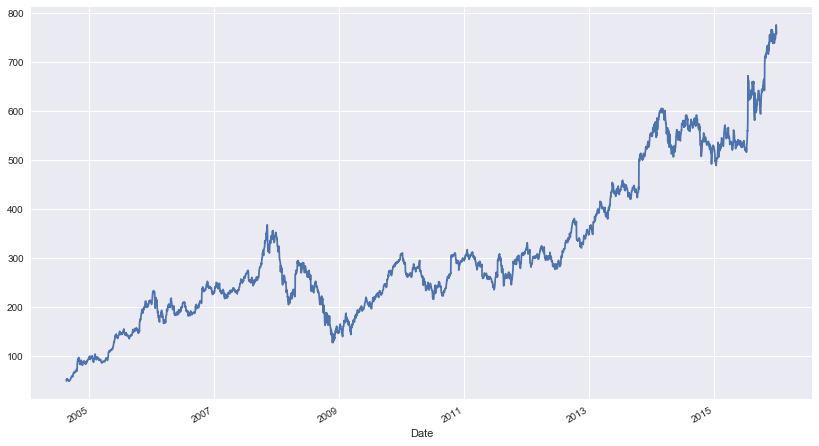

In [184]:
fig = plt.figure(figsize=[14,8])
goog.plot()

### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency.
This can be done using the ``resample()`` method, or the much simpler ``asfreq()`` method.
The primary difference between the two is that ``resample()`` is fundamentally a *data aggregation*, while ``asfreq()`` is fundamentally a *data selection*.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data.
Here we will resample the data at the end of business year:

In [185]:
goog.resample('W')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [187]:
weeklymeangoog = goog.resample('W').mean()

In [190]:
goog.size

2863

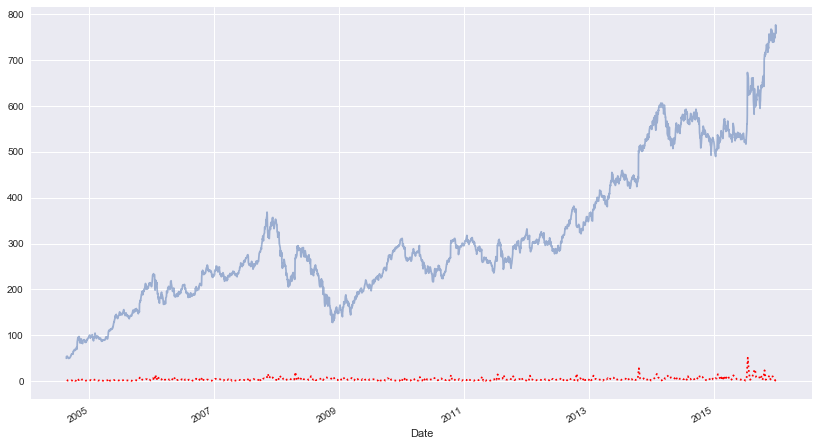

In [198]:
fig = plt.figure(figsize=[14,8])
goog.plot(alpha=0.5, style='-')
goog.resample('W').std().plot(style=':r')
#goog.asfreq('BA').plot(style='--');
#plt.legend(['input', 'resample', 'asfreq'],
#           loc='upper left');

Notice the difference: at each point, ``resample`` reports the *average of the previous year*, while ``asfreq`` reports the *value at the end of the year*.

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

In [199]:
goog.iloc[:10].asfreq('B')

Date
2004-08-19    49.845802
2004-08-20    53.805050
2004-08-23    54.346527
2004-08-24    52.096165
2004-08-25    52.657513
2004-08-26    53.606342
2004-08-27    52.732029
2004-08-30    50.675404
2004-08-31    50.854240
2004-09-01    49.801090
Freq: B, Name: Close, dtype: float64

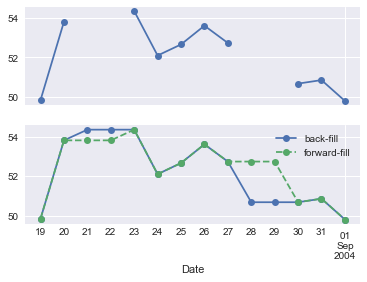

In [200]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot.
The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### Time-shifts

Another common time series-specific operation is shifting of data in time.
Pandas has two closely related methods for computing this: ``shift()`` and ``tshift()``
In short, the difference between them is that ``shift()`` *shifts the data*, while ``tshift()`` *shifts the index*.
In both cases, the shift is specified in multiples of the frequency.

Here we will both ``shift()`` and ``tshift()`` by 900 days; 

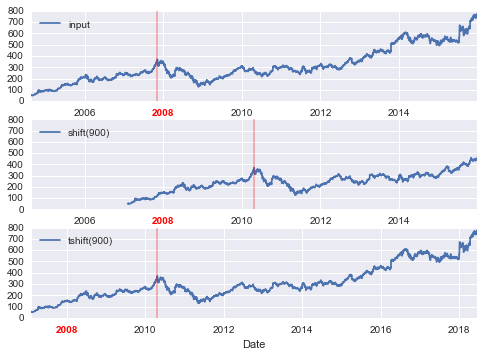

In [31]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We see here that ``shift(900)`` shifts the *data* by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while ``tshift(900)`` shifts the *index values* by 900 days.

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

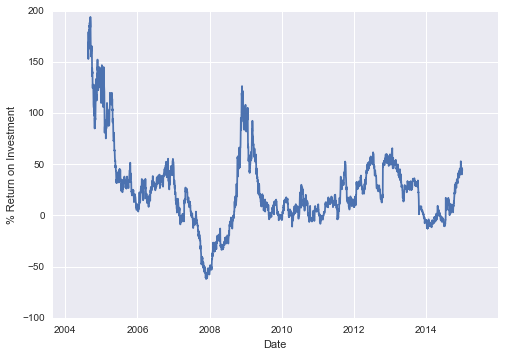

In [32]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession.

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas.
These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation.
This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

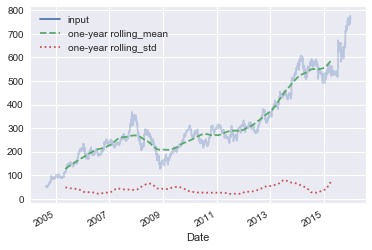

In [202]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

As with group-by operations, the ``aggregate()`` and ``apply()`` methods can be used for custom rolling computations.

## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [204]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:

In [205]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

Now let's take a look at the summary statistics for this data:

In [206]:
data.dropna().describe()

,West,East,Total
count,43768.000000,43768.000000,43768.000000
mean,55.671381,55.699506,111.370887
std,73.803712,80.307510,139.966706
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,30.000000,28.000000,61.000000
75%,73.000000,68.000000,146.000000
max,854.000000,717.000000,1165.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [208]:
#%matplotlib inline
import seaborn; seaborn.set()

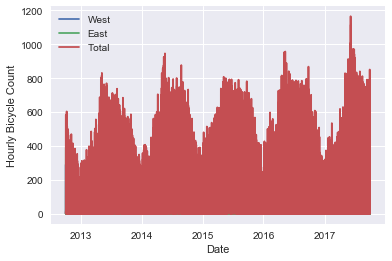

In [209]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

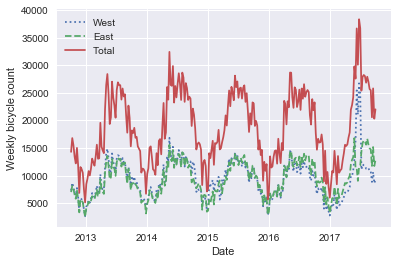

In [212]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

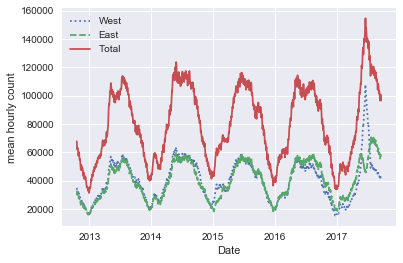

In [213]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

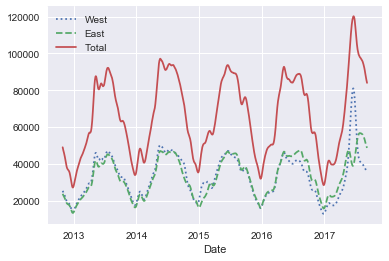

In [215]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality.

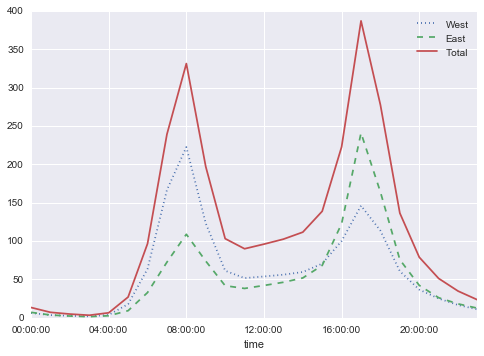

In [43]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

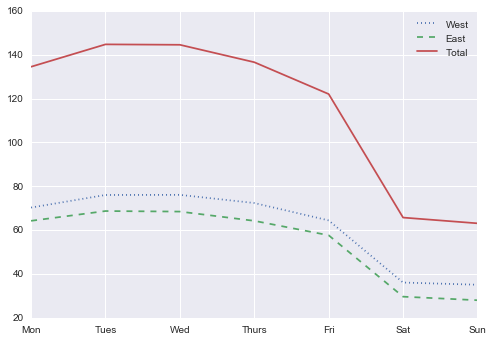

In [44]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [45]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

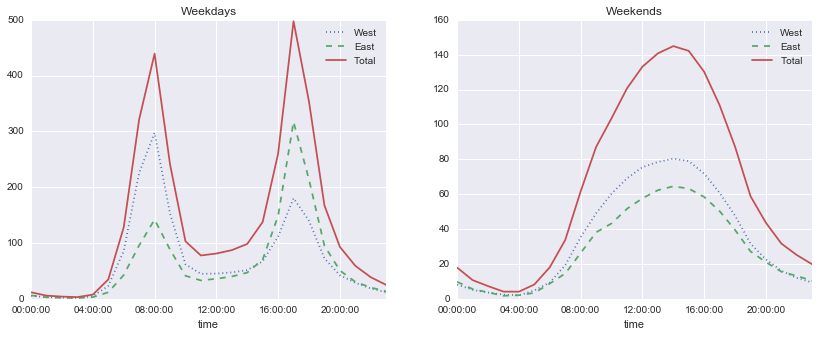

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.